We wish to study the spherically symmetric Gross-Pitaevskii equation in two space dimentions.

$$\left[ -\frac{\hbar}{2m} \nabla^2 + \frac{1}{2} m \omega^2 r^2 
    + g N |\Psi(r)|^2 - \mu \right] \Psi(r) = 0$$
    
where $m$ is the mass of a single bosonic atom, $N$ is the number of atoms in the condensate, $m \omega^2 r^2 / 2$ is the attractive harmonic oscillator trap potential, $\omega$ is the oscillator frequency, and $g$ is the strength of the interatomic interaction. A positive $g$ corresponds to a repulsive interaction and a negative $g$ to an attractive interaction. $\mu$ is the chimal potential of the condensate.

In [55]:
%matplotlib inline
import scipy.sparse as sp
import scipy.sparse.linalg as sla
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

Next import the `dvr_1d` and `dvr_2d` module. We import them using a series of ipython notebook magic commands so that we can make changes to the module file and test those changes in this notebook without having to restart the notebook kernel.

In [2]:
# autoreload the lattice module so that we can make changes to it 
# without restarting the ipython notebook server
%load_ext autoreload
%autoreload 1
%aimport dvr_1d
%aimport dvr_2d

Define the confining potential

In [23]:
def V(x):
    return np.square(x)

In [70]:
d = dvr_1d.BesselDVR(npts=100, R=10., dim=2, lam=0)
h0 = d.h(V)
def h(psi, c):
    return h0 + c * np.power(psi, 3.) / d.x

def get_mu(psi, c):
    return psi.dot(h(psi, c).dot(psi)) / psi.dot(psi)

In [77]:
def G(psi, c=-1.):
    return h0.dot(psi) + c * np.power(psi, 3.) / d.x - 2. * get_mu(psi, c)

In [78]:
psi0 = np.sqrt(d.x) * np.exp(-d.x**2.)

In [79]:
U = opt.newton_krylov(G, psi0)

ValueError: expected square matrix, but got shape=(10000, 100)

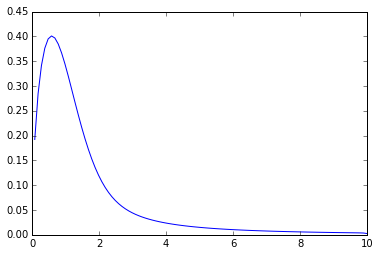

In [76]:
plt.plot(d.x, U)